## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- "Todesfälle bei Kindern durch invasive Pneumokokken-Erkrankungen weltweit (2000-2003)" 
### 1.2 Fragestellungen:
- "Wie haben sich die Todesfälle durch Pneumokokken-bedingte Pneumonie, Meningitis und andere invasive Krankheiten weltweit zwischen den Jahren 2000 und 2003 verändert?"   
- "Wie verteilten sich die Todesfälle durch invasive Pneumokokken-Erkrankungen in den Jahren 2000 und 2003 prozentual auf Pneumonie, Meningitis und andere Krankheiten?"
- "In welchem Jahr zwischen 2000 und 2003 wurde weltweit der grösste Rückgang der Todesfälle durch Pneumokokken-Erkrankungen insgesamt sowie in den einzelnen Krankheitskategorien beobachtet?“
- "In welchen Ländern wurden zwischen den Jahren 2000 und 2003 die grössten Veränderungen der Todesfälle durch Streptokokken-Krankheiten verzeichnet?"
- "Welche sind die 5 Länder mit den höchsten Todesfällen durch Streptokokken-Krankheiten in den Jahren 2000 bis 2003?"
### 1.3 Datenquelle(n):
- https://ourworldindata.org/pneumonia 





### 1.4 Daten beschaffen und laden

In [1]:


import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:

df_orig = pd.read_csv("child-deaths-from-streptococcus-by-disease.csv")
df_orig.head()

,Entity,Code,Year,Streptococcus non-pneumonia-non-meningitis deaths (aged under-5),Streptococcus meningitis deaths (aged under-5),Streptococcus pneumonia deaths (aged under-5)
0,Afghanistan,AFG,2000,499,1588,8257
1,Afghanistan,AFG,2001,508,1617,8415
2,Afghanistan,AFG,2002,510,1622,8520
3,Afghanistan,AFG,2003,510,1623,8598
4,Afghanistan,AFG,2004,506,1609,8603


## 2. Daten vorbereiten 
- Die Roh-Daten sind bereits im Long-Format vorhanden.
- Für die Analyse werden die Roh-Daten pivotiert: Jede Spalte repräsentiert eine Kategorie der Todesfälle (z. B.Pneumonie, Meningitis, invasive nicht-Pneumonie), und die Zeilen sind die verschiedenen Jahre in aufsteigender Reihenfolge. 

In [34]:
df_pivot = df_orig.pivot_table(index='Entity', columns='Year', values=["Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)", "Streptococcus meningitis deaths (aged under-5)", "Streptococcus pneumonia deaths (aged under-5)" ])
df_pivot.head()

Streptococcus meningitis deaths (aged under-5)                  \
Year                                                  2000    2001    2002   
Entity                                                                       
Afghanistan                                         1588.0  1617.0  1622.0   
Albania                                                5.0     4.0     4.0   
Algeria                                              107.0   102.0    97.0   
Andorra                                                0.0     0.0     0.0   
Angola                                              1305.0  1322.0  1369.0   

                                                                     ...  \
Year           2003    2004    2005    2006    2007    2008    2009  ...   
Entity                                                               ...   
Afghanistan  1623.0  1609.0  1579.0  1553.0  1511.0  1462.0  1407.0  ...   
Albania         3.0     3.0     2.0     2.0     2.0     2.0     3.0  ...   
Algeria        92.0    90.0    88.0    88.0    89.0    91.0    93.0  ...   
Andorra         0.0     0.0     0.0     0.0     0.0     0.0     0.0  ...   
Angola       1381.0  1393.0  1418.0  1444.0  1464.0  1484.0  1487.0  ...   

            Streptococcus pneumonia deaths (aged under-5)                    \
Year                                                 2006     2007     2008   
Entity                                                                        
Afghanistan                                        8493.0   8394.0   8267.0   
Albania                                              30.0     26.0     23.0   
Algeria                                             901.0    908.0    930.0   
Andorra                                               0.0      0.0      0.0   
Angola                                            11687.0  12096.0  12432.0   

                                                                           
Year            2009     2010     2011     2012     2013     2014    2015  
Entity                                                                     
Afghanistan   8113.0   7920.0   7663.0   7369.0   7046.0   5496.0  4199.0  
Albania         23.0     23.0     14.0     12.0     11.0     11.0     9.0  
Algeria        941.0    950.0    956.0    969.0    978.0    974.0   972.0  
Andorra          0.0      0.0      0.0      0.0      0.0      0.0     0.0  
Angola       12606.0  12681.0  12611.0  12462.0  11867.0  10033.0  8704.0  

[5 rows x 48 columns]

## 3. Statistik der Rohdaten (Analyse im Long-Format)


- Die Spalte "Entity" enthält 195 verschiedene Entitys 
- Der Graph zeigt, dass die Regionen "Nord" und "Süd" mit jeweils 3 Einträgen die meisten Datenpunkte aufweisen, während die Regionen "Ost" und "West" mit jeweils 2 Einträgen weniger vertreten sind.

- Die Spalte "Code" enthält 4 verschiedene Codes.
- Die Grafik zeigt die Verteilung der Einträge pro Code, wobei die Codes "N" und "S" jeweils 30 % der Gesamtanzahl ausmachen, während "O" und "W" jeweils 20 % der Einträge ausmachen.

- Die Daten umfassen den Zeitraum von 2000 bis 2015, wobei der Fokus auf den vier Jahren von 2000 bis einschliesslich 2003 liegt.
- Die Grafik zeigt die Anzahl der Einträge pro Jahr, wobei im Jahr 2000 mit 4 Einträgen die höchste und im Jahr 2001 mit 2 Einträgen die niedrigste Anzahl verzeichnet wurde, gefolgt von einem Anstieg im Jahr 2002 und einem erneuten Rückgang im Jahr 2003. 

- Die Daten beziehen sich auf drei Krankheiten: Todesfälle durch Streptococcus non-pneumonia-non-meningitis, Streptococcus meningitis und Streptococcus pneumonia. 


In [104]:
df.dtypes

Entity                                                              object
Code                                                                object
Year                                                                 int64
Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)     int64
Streptococcus meningitis deaths (aged under-5)                       int64
Streptococcus pneumonia deaths (aged under-5)                        int64
dtype: object

### 3.1 Analyse Entity

In [65]:
print('Anzahl verschiedener Entity:', len(df_orig['Entity'].unique()))

Anzahl verschiedener Entity: 195


In [66]:
df_orig['Entity'].value_counts()

Entity
Afghanistan    16
Saint Lucia    16
Nicaragua      16
Niger          16
Nigeria        16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: count, Length: 195, dtype: int64

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]
}
df = pd.DataFrame(data)


In [74]:
entity_counts = df['Entity'].value_counts()

<Axes: title={'center': 'Häufigkeit der Einträge pro Entity'}, xlabel='Entity', ylabel='Anzahl der Einträge'>

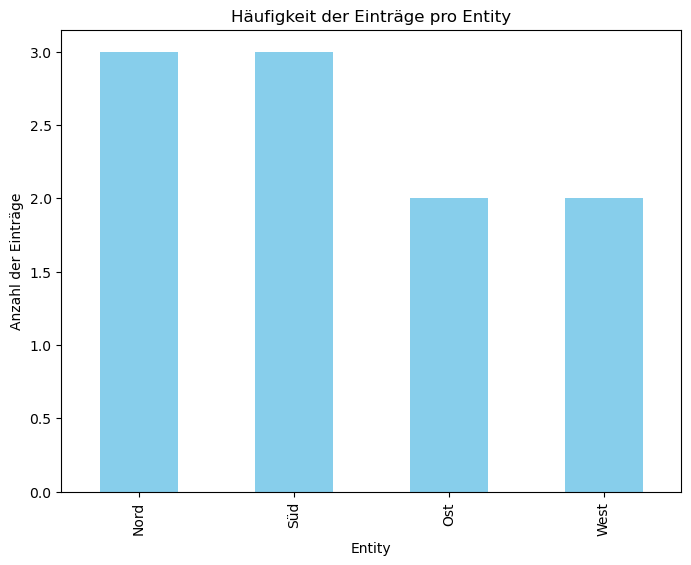

In [75]:
entity_counts.plot(
    kind='bar',
    color='skyblue',
    figsize=(8, 6),
    ylabel='Anzahl der Einträge',
    title='Häufigkeit der Einträge pro Entity')

### 3.2 Analyse Codes

In [43]:
import pandas as pd

# Beispiel-DataFrame
df = pd.DataFrame({'Code':['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S', None]})

# Anzahl eindeutiger Werte
print('Anzahl verschiedener Code: ', len(df['Code'].dropna().unique()))

Anzahl verschiedener Code:  4


In [44]:
print(df['Code'].value_counts())

Code
N    3
S    3
O    2
W    2
Name: count, dtype: int64


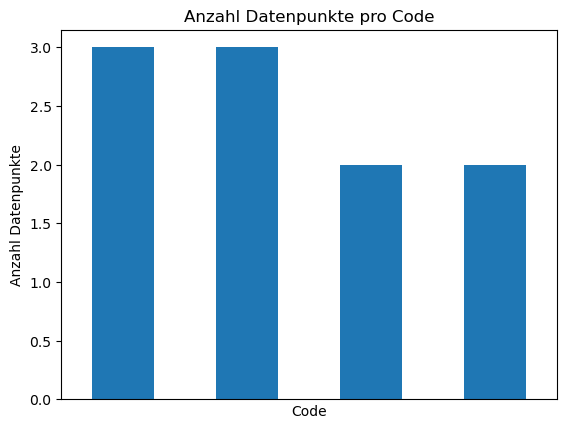

In [45]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
code_counts = df['Code'].value_counts()

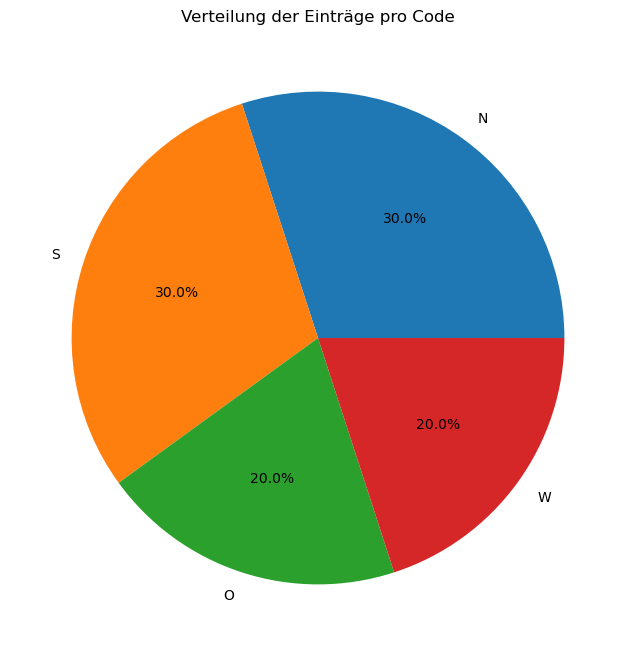

In [72]:
code_counts.plot(
    kind='pie',
    autopct='%1.1f%%', figsize=(8, 8), title='Verteilung der Einträge pro Code', ylabel='')
plt.show()

### 3.3 Analyse Year

In [87]:
print('Anzahl verschiedener Years: ', len(df['Year'].unique()))

Anzahl verschiedener Years:  4


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
data = df_orig 
df = pd.DataFrame(data)
year_counts = df['Year'].value_counts().sort_index()



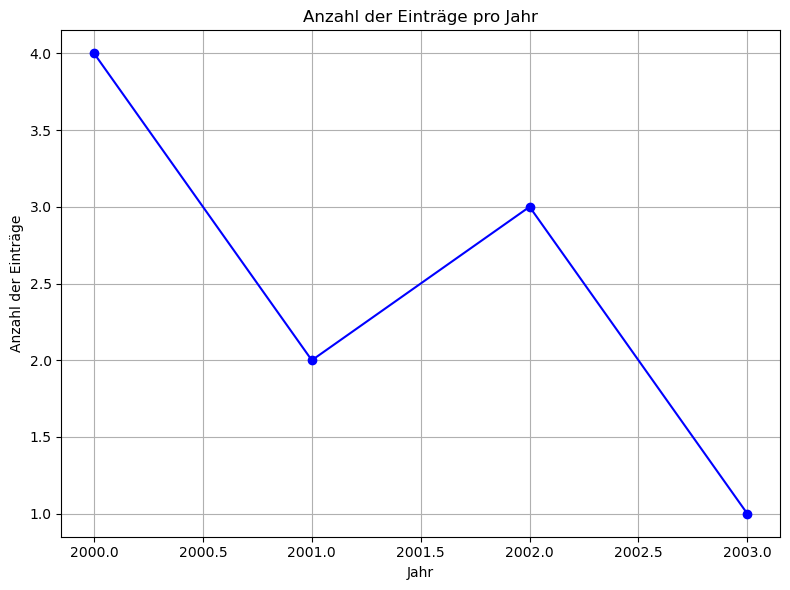

In [80]:
year_counts.plot(
    kind='line', marker='o', color='blue', figsize=(8, 6), ylabel='Anzahl der Einträge', xlabel='Jahr', title='Anzahl der Einträge pro Jahr')
plt.grid(True)  
plt.tight_layout()
plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
year_counts = df['Year'].value_counts().sort_index()

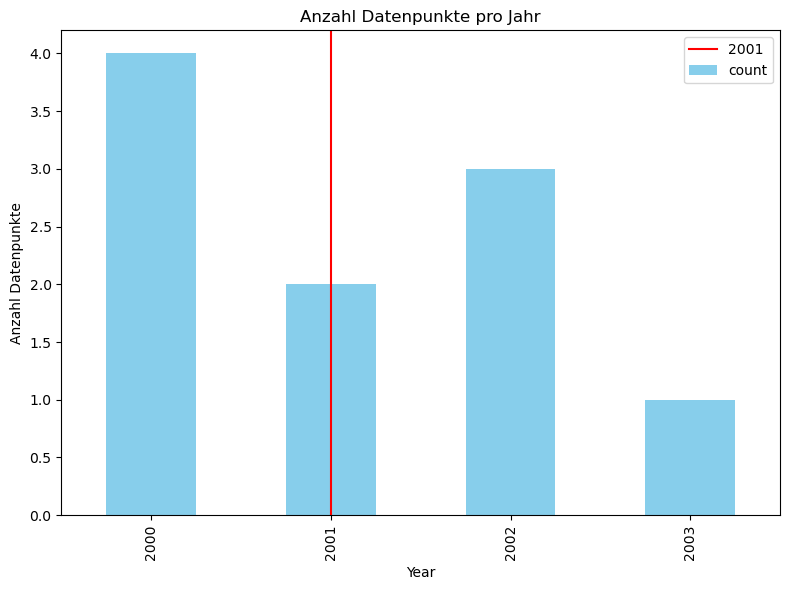

In [96]:
g = year_counts.plot(
    kind='bar', ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr', figsize=(8, 6), color='skyblue')
g.axvline(x=year_counts.index.get_loc(2001), color='red', label='2001')  # Linie bei 2001
g.legend()
plt.tight_layout()
plt.show()

### 3.4 Analyse Krankheiten Streptococcus non-pneumonia-non-meningitis deaths (aged under-5), Streptococcus meningitis deaths (aged under-5), Streptococcus pneumonia deaths (aged under-5)

In [99]:
df.describe()

,Year,Streptococcus non-pneumonia-non-meningitis deaths (aged under-5),Streptococcus meningitis deaths (aged under-5),Streptococcus pneumonia deaths (aged under-5)
count,10.000000,10.000000,10.00000,10.000000
mean,2001.100000,13.800000,4.50000,10.200000
std,1.100505,5.846176,1.95789,4.315347
min,2000.000000,5.000000,2.00000,4.000000
25%,2000.000000,10.000000,3.00000,7.250000
50%,2001.000000,13.500000,4.00000,9.500000
75%,2002.000000,18.750000,5.75000,12.750000
max,2003.000000,22.000000,8.00000,18.000000


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
totals = df[
    ['Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)','Streptococcus meningitis deaths (aged under-5)','Streptococcus pneumonia deaths (aged under-5)']].sum()


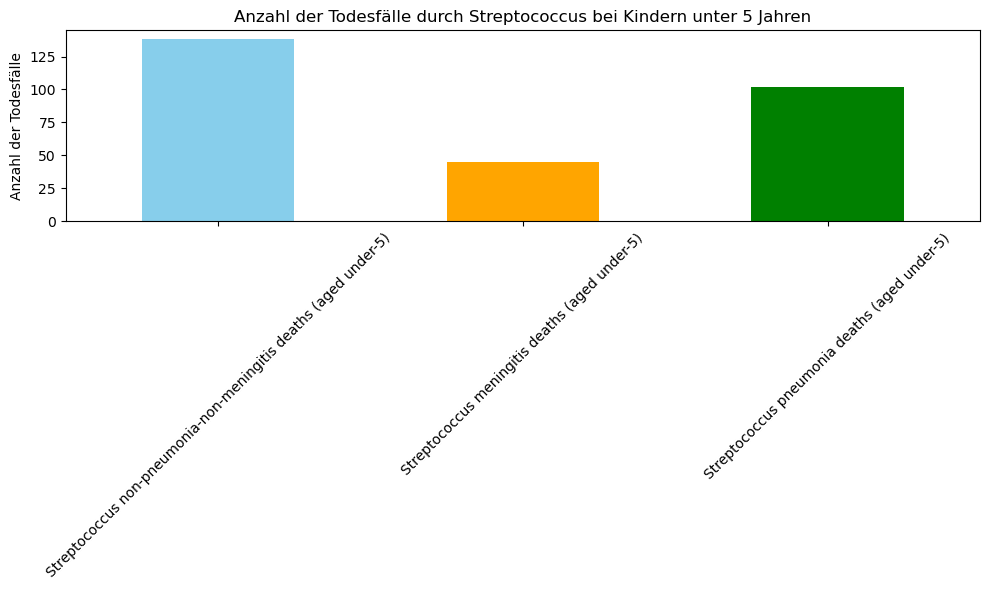

In [102]:
totals.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange', 'green'], ylabel='Anzahl der Todesfälle', title='Anzahl der Todesfälle durch Streptococcus bei Kindern unter 5 Jahren')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.5 Analyse Roh-Daten 

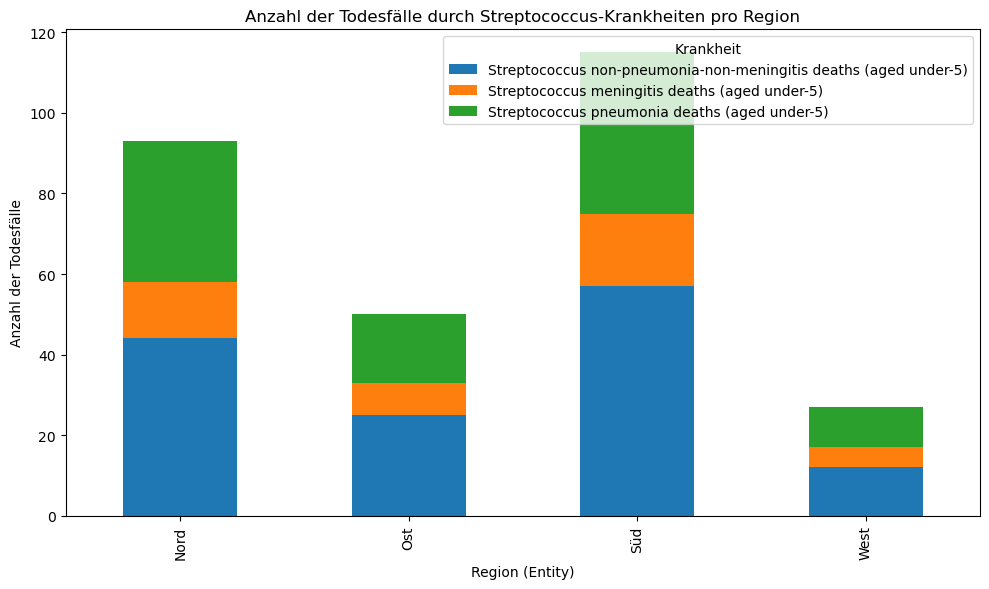

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
df_orig= data = {
    'Entity': ['Nord', 'Süd', 'Ost', 'West', 'Nord', 'Süd', 'Nord', 'West', 'Ost', 'Süd'],
    'Code': ['N', 'S', 'O', 'W', 'N', 'S', 'N', 'W', 'O', 'S'],
    'Year': [2000, 2000, 2000, 2000, 2001, 2001, 2002, 2002, 2002, 2003],
    'Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)': [10, 20, 15, 5, 12, 18, 22, 7, 10, 19],
    'Streptococcus meningitis deaths (aged under-5)': [3, 6, 4, 2, 3, 5, 8, 3, 4, 7],
    'Streptococcus pneumonia deaths (aged under-5)': [8, 15, 10, 4, 9, 13, 18, 6, 7, 12]}
df = pd.DataFrame(data)
df_grouped = df.groupby('Entity').sum(numeric_only=True)
df_grouped[['Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)',
            'Streptococcus meningitis deaths (aged under-5)',
            'Streptococcus pneumonia deaths (aged under-5)']].plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title('Anzahl der Todesfälle durch Streptococcus-Krankheiten pro Region')
plt.ylabel('Anzahl der Todesfälle')
plt.xlabel('Region (Entity)')
plt.legend(title='Krankheit')
plt.tight_layout()
plt.show()

## 4. Analyse
### Beobachtungen
- Die erste Grafik zeigt die weltweite Veränderung der Todesfälle bei Kindern unter 5 Jahren durch pneumokokkenbedingte Krankheiten (2000–2003). 
- Es ist ersichtlich, dass die Todesfälle durch Streptococcus pneumoniae abnehmen, während die Todesfälle durch Meningitis und andere pneumokokkenbedingte Krankheiten vergleichsweise stabil bleiben.

- Die zweite Grafik zeigt die prozentuale Verteilung der Todesfälle durch invasive Pneumokokken-Erkrankungen (Non-pneumonia-non-meningitis, Meningitis und Pneumonie) in den Jahren 2000 und 2003:

1. Pneumonie: Der grösste Anteil der Todesfälle entfällt in beiden Jahren deutlich auf Pneumonie, wobei ihr Anteil leicht zugenommen hat.

2. Non-pneumonia-non-meningitis: Diese Kategorie stellt den zweitgrössten Anteil dar, jedoch ist der Anteil im Jahr 2003 im Vergleich zu 2000 etwas gesunken.

3. Meningitis: Der Anteil an Todesfällen durch Meningitis ist in beiden Jahren am geringsten und bleibt nahezu unverändert.
Insgesamt zeigt die Grafik eine Stabilität in der Rangfolge der Kategorien, jedoch mit kleinen Verschiebungen in den prozentualen Anteilen.

- Die Grafik zeigt den jährlichen Rückgang der Todesfälle durch invasive Pneumokokken-Erkrankungen (2000-2003) für drei Kategorien: Meningitis, Non-pneumonia-non-meningitis und Pneumonie sowie die Gesamtsumme.

1. Streptococcus pneumonia deaths (grün): Der grösste Rückgang der Todesfälle ist in dieser Kategorie zu beobachten. Der Rückgang ist in allen Jahren signifikant und dominiert den Gesamtrückgang.
2. Streptococcus non-pneumonia-non-meningitis deaths (blau): Der Rückgang ist vergleichsweise gering und stabil, mit kleinen Schwankungen zwischen den Jahren.
3. Streptococcus meningitis deaths (orange): Diese Kategorie zeigt den geringsten Rückgang. Der jährliche Rückgang ist relativ konstant und kaum ausgeprägt im Vergleich zu den anderen Kategorien.
4. Gesamtrückgang (rot): Die Gesamtwerte spiegeln grösstenteils den Rückgang der Pneumonie-Todesfälle wider, da diese Kategorie den grössten Anteil hat. Der Gesamtrückgang ist in jedem Jahr deutlich sichtbar.

Zusammenfassend zeigt die Grafik, dass die Todesfälle durch Pneumonie den grössten Einfluss auf den Gesamtrückgang haben, während die anderen Kategorien weniger stark variieren.

- Die vierte Grafik zeigt die grössten Veränderungen der Todesfälle durch Streptococcus-Krankheiten zwischen 2000 und 2003 in verschiedenen Ländern. 
- Angola und Burkina Faso verzeichneten den grössten Rückgang, während die anderen Länder wie Nigeria, Somalia und Afghanistan ebenfalls signifikante Verbesserungen zeigten, jedoch in geringerem Ausmass.

- Die fünfte Grafik zeigt die Top 5 Länder mit den höchsten Todesfällen durch Streptococcus-Krankheiten im Zeitraum 2000–2003:
1. Indien hat mit deutlichem Abstand die meisten Todesfälle, was auf die grosse Bevölkerungszahl und möglicherweise begrenzte medizinische Versorgung in bestimmten Regionen zurückzuführen ist.
2. Nigeria, Pakistan, Äthiopien und die Demokratische Republik Kongo folgen mit deutlich geringeren, aber immer noch erheblichen Todeszahlen.
3. Die Top-Länder in der Grafik sind tendenziell Länder mit grossen Bevölkerungen und eingeschränktem Zugang zu hochwertigen medizinischen Einrichtungen oder präventiven Massnahmen wie Impfungen.

### Interpretation
- Die Einführung der Pneumokokken-Impfung in Indien führte zu einem Rückgang der Todesfälle bei Kindern, insbesondere durch schwere Infektionen wie Pneumonien und andere invasive Pneumokokken-Erkrankungen. Diese Impfung trug wesentlich zur Verbesserung der Kindersterblichkeit bei, indem sie das Risiko dieser lebensbedrohlichen Krankheiten reduzierte und somit vielen Kindern das Leben rettete.
- Der Rückgang der Todesfälle durch Pneumokokken-Erkrankungen in den Jahren 2000-2003 wurde durch die Einführung und Ausweitung von Pneumokokken-Impfstoffen, insbesondere des konjugierten Pneumokokken-Impfstoffs, beeinflusst, was in der Grafik durch den sinkenden Trend in dieser Zeit sichtbar wird.
- Die Verbesserung der medizinischen Versorgung und Behandlungsmöglichkeiten hat zur Reduzierung der Todesfälle beigetragen, was sich in der Grafik durch die deutliche Abnahme der Sterblichkeit widerspiegelt.
- Veränderungen in sozialen und wirtschaftlichen Bedingungen, wie der verbesserte Zugang zu Gesundheitsdiensten, fürhten zur Abnahme der Todesfälle, was in der Grafik durch den insgesamt rückläufigen Trend der Pneumokokken-bedingten Sterblichkeit in diesem Zeitraum erkennbar ist.
- Die mangelhafte medizinische Versorgung in Indien zwischen 2000 und 2003 führte zu einer hohen Kindersterblichkeit und begrenztem Zugang zu medizinischer Versorgung.
- Der Mangel an qualifiziertem Personal und die schlechte Infrastruktur trugen in den Jahren 2000 bis 2003 erheblich zur Gesundheitskrise bei.
- Diese Herausforderungen in den frühen 2000er Jahren verdeutlichen die Notwendigkeit von Reformen und Investitionen im Gesundheitssektor, um die Lebensqualität der Bevölkerung zu verbessern.



### Quellen
- https://www.who.int/europe/de 
- https://www.cdc.gov/ 
- https://pubmed.ncbi.nlm.nih.gov/ 
- https://www.bpb.de/themen/asien/indien/189184/zwischen-versorgungsnotstand-und-medizintourismus/ 
- https://individuelle-impfentscheidung.de/impfungen/pneumokokken.html 



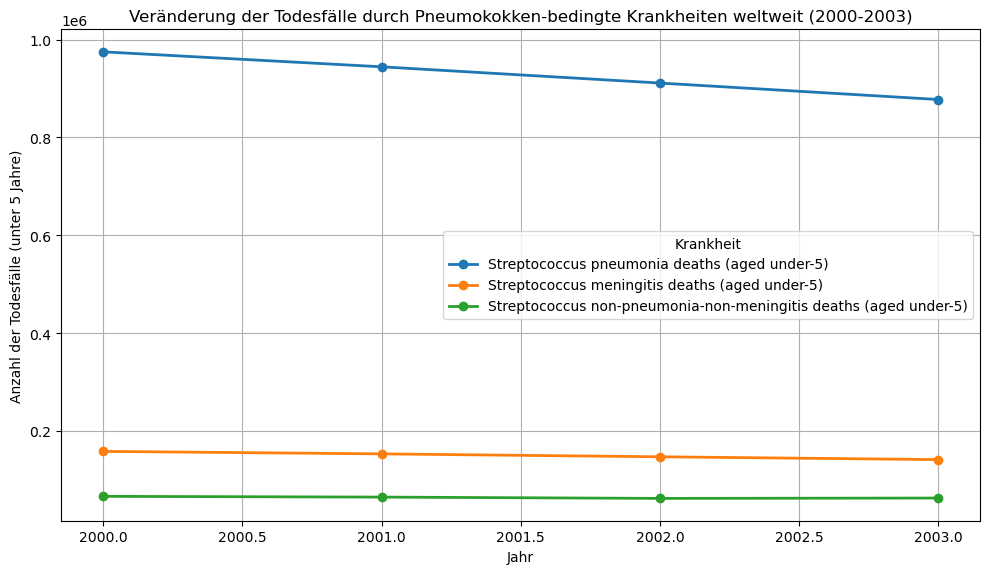

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

dateipfad = 'child-deaths-from-streptococcus-by-disease.csv'
df = pd.read_csv(dateipfad)

jahre = [2000, 2001, 2002, 2003]
krankheiten = [
    "Streptococcus pneumonia deaths (aged under-5)",
    "Streptococcus meningitis deaths (aged under-5)",
    "Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)"]

df_filtered = df[df['Year'].isin(jahre)]
summen = df_filtered.groupby('Year')[krankheiten].sum()

plt.figure(figsize=(10, 6))

for krankheit in krankheiten:
    plt.plot(summen.index, summen[krankheit], label=krankheit, marker='o', linewidth=2)

plt.title('Veränderung der Todesfälle durch Pneumokokken-bedingte Krankheiten weltweit (2000-2003)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Todesfälle (unter 5 Jahre)')
plt.legend(title='Krankheit')
plt.grid(True)

plt.tight_layout()
plt.show()

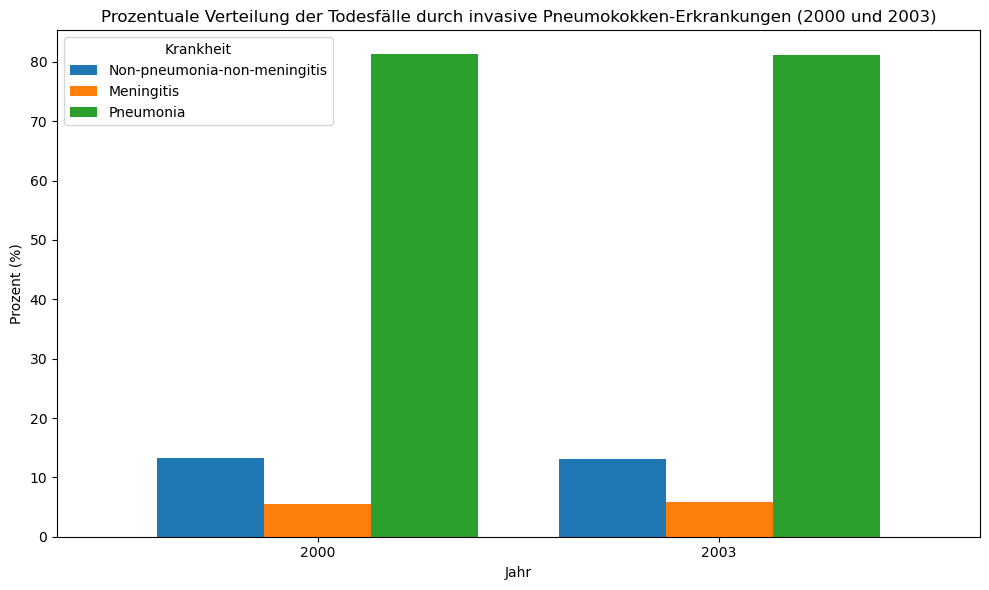

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

df_pivot = df_orig.pivot_table(
   index='Entity',
   columns='Year',
   values=["Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)",
       "Streptococcus meningitis deaths (aged under-5)",
       "Streptococcus pneumonia deaths (aged under-5)"])

df_total = df_pivot.sum(axis=0)

columns_2000 = [col for col in df_total.index if '2000' in str(col)]
columns_2003 = [col for col in df_total.index if '2003' in str(col)]
data_2000 = df_total[columns_2000]
data_2003 = df_total[columns_2003]

percent_2000 = (data_2000 / data_2000.sum()) * 100
percent_2003 = (data_2003 / data_2003.sum()) * 100

distribution = pd.DataFrame({
   '2000': percent_2000.values,
   '2003': percent_2003.values
}, index=['Non-pneumonia-non-meningitis', 'Meningitis', 'Pneumonia'])

distribution.T.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Prozentuale Verteilung der Todesfälle durch invasive Pneumokokken-Erkrankungen (2000 und 2003)')
plt.ylabel('Prozent (%)')
plt.xlabel('Jahr')
plt.xticks(rotation=0)
plt.legend(title='Krankheit')
plt.tight_layout()
plt.show()

Jahr mit dem größten Rückgang pro Kategorie:
Category
Streptococcus meningitis deaths (aged under-5)                      2002
Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)    2002
Streptococcus pneumonia deaths (aged under-5)                       2003
dtype: int64


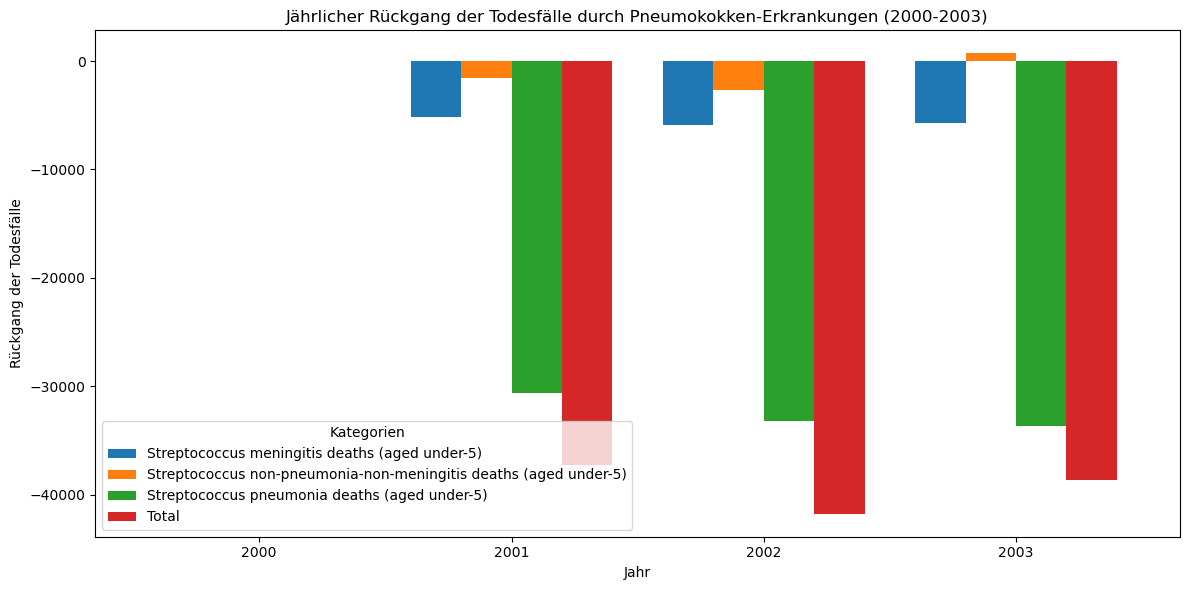

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
# Daten auf den Zeitraum 2000–2003 beschränken
df_filtered = df_orig[df_orig['Year'].between(2000, 2003)]
# Pivot-Tabelle erstellen
df_pivot = df_filtered.pivot_table(
   index='Entity',
   columns='Year',
   values=[
       "Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)",
       "Streptococcus meningitis deaths (aged under-5)",
       "Streptococcus pneumonia deaths (aged under-5)"
   ]
)
# Summe der Todesfälle weltweit pro Krankheit und Jahr
df_total_per_year = df_pivot.sum(axis=0)
# Konvertiere MultiIndex in Spalten für bessere Lesbarkeit
df_total_per_year = df_total_per_year.reset_index()
df_total_per_year.columns = ["Category", "Year", "Deaths"]
# Pivotiere die Daten, um Jahresdifferenzen zu berechnen
df_total_pivot = df_total_per_year.pivot(index="Year", columns="Category", values="Deaths")
# Berechne die Differenzen pro Jahr
category_diff = df_total_pivot.diff()
# Jahr mit größtem Rückgang für jede Kategorie
largest_drop = category_diff.idxmin()
print("Jahr mit dem größten Rückgang pro Kategorie:")
print(largest_drop)
# Füge eine Gesamtsumme hinzu und berechne Differenzen
df_total_pivot["Total"] = df_total_pivot.sum(axis=1)
total_diff = df_total_pivot["Total"].diff()
# Plot der Differenzen
category_diff["Total"] = total_diff
category_diff.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Jährlicher Rückgang der Todesfälle durch Pneumokokken-Erkrankungen (2000-2003)')
plt.ylabel('Rückgang der Todesfälle')
plt.xlabel('Jahr')
plt.xticks(rotation=0)
plt.legend(title='Kategorien')
plt.tight_layout()
plt.show()

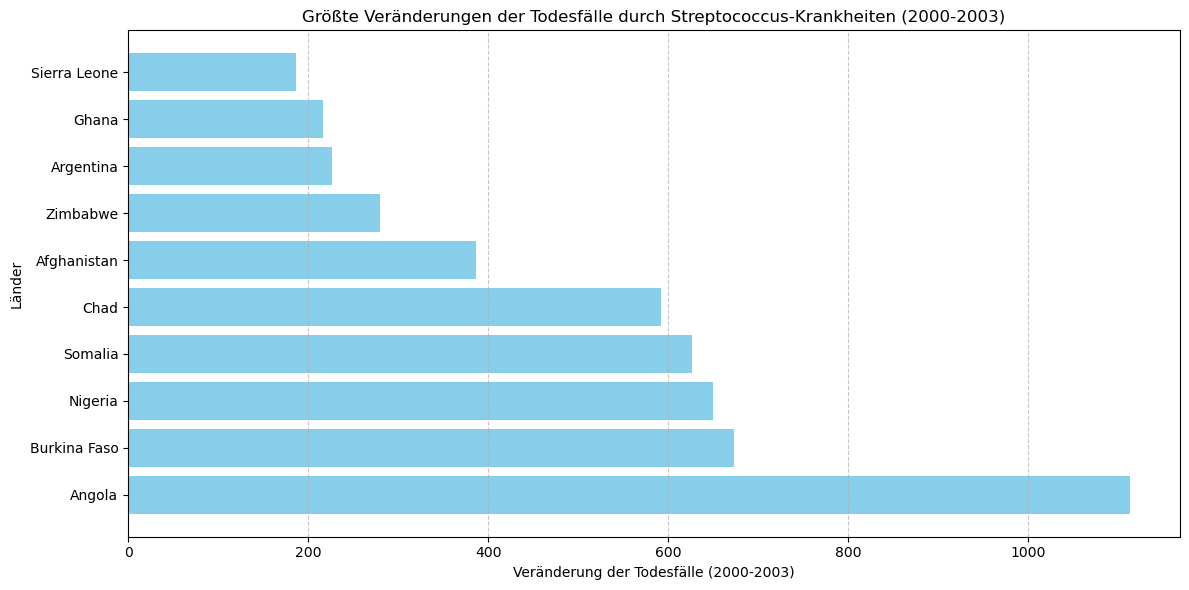

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("child-deaths-from-streptococcus-by-disease.csv")

# Daten filtern für die relevanten Jahre und Spalten
jahre = ['2000', '2003']
df_filtered = df[df['Year'].isin([2000, 2003])]
df_pivot = df_filtered.pivot_table(
    index='Entity',
    columns='Year',
    values=[
        "Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)",
        "Streptococcus meningitis deaths (aged under-5)",
        "Streptococcus pneumonia deaths (aged under-5)"
    ]
)

# Veränderung zwischen 2000 und 2003 berechnen
df_pivot['Total_2000'] = df_pivot.xs(2000, axis=1, level='Year').sum(axis=1)
df_pivot['Total_2003'] = df_pivot.xs(2003, axis=1, level='Year').sum(axis=1)
df_pivot['Change'] = df_pivot['Total_2003'] - df_pivot['Total_2000']

# Top 10 Länder mit den größten Veränderungen
df_top_changes = df_pivot[['Change']].sort_values(by='Change', ascending=False).head(10)

# Grafik erstellen
plt.figure(figsize=(12, 6))
plt.barh(df_top_changes.index, df_top_changes['Change'], color='skyblue')
plt.xlabel('Veränderung der Todesfälle (2000-2003)')
plt.ylabel('Länder')
plt.title('Größte Veränderungen der Todesfälle durch Streptococcus-Krankheiten (2000-2003)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 


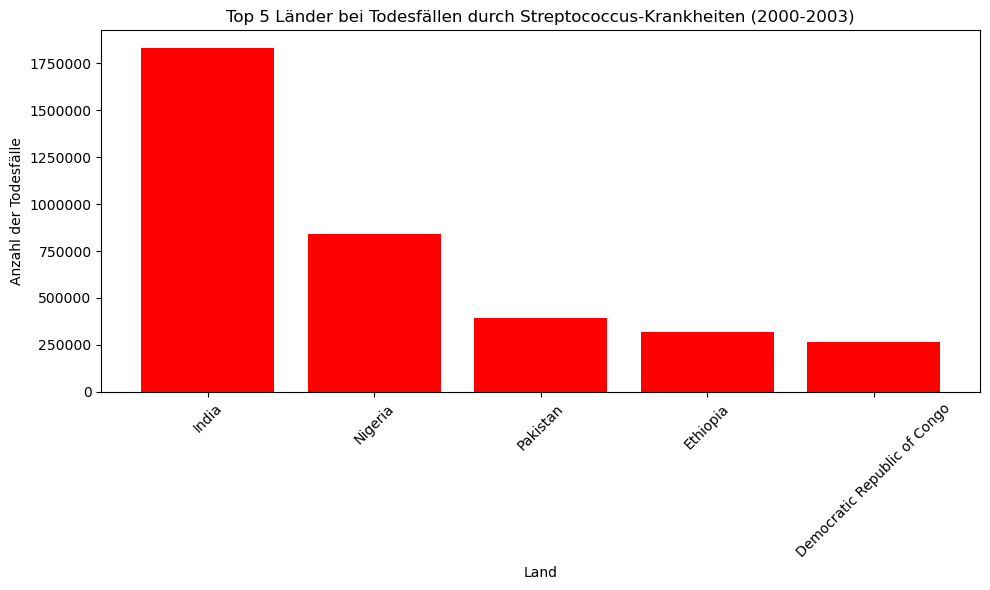

Top 5 Länder mit den meisten Todesfällen:
Entity
India                           1834653.0
Nigeria                          840818.0
Pakistan                         392538.0
Ethiopia                         320902.0
Democratic Republic of Congo     265932.0
dtype: float64


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

df_filtered = df_orig[df_orig["Entity"] != "World"]

df_pivot = df_filtered.pivot_table(
   index='Entity',
   columns='Year',
   values=["Streptococcus non-pneumonia-non-meningitis deaths (aged under-5)",
       "Streptococcus meningitis deaths (aged under-5)",
       "Streptococcus pneumonia deaths (aged under-5)"])

df_sum = df_pivot.sum(axis=1)

num_extremes = 5  
most_deaths = df_sum.nlargest(num_extremes)

plt.figure(figsize=(10, 6))
plt.bar(most_deaths.index, most_deaths.values, color='red')
plt.title("Top 5 Länder bei Todesfällen durch Streptococcus-Krankheiten (2000-2003)")
plt.ylabel("Anzahl der Todesfälle")
plt.xlabel("Land")
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')  
plt.tight_layout()
plt.show()
print("Top 5 Länder mit den meisten Todesfällen:")
print(most_deaths)